# Get metrics and Plot

In [5]:
from lib.model import Model
from lib.loss import NegRLoss
from scipy.stats import linregress
import numpy as np

import matplotlib.pyplot as plt
import sys
from lib.eval import *
import numpy as np
import glob
import os

In [7]:
log_dir = "logs/NN_train_seed0_lr0.000227_bs_1_Mon May  8 18:23:51 2023"

evaluator = Evaluator(log_dir)

In [8]:
train_non_mae, train_nmae, train_r = evaluator.get_metrics(evaluator.train_loader)
valid_non_mae, valid_nmae, valid_r = evaluator.get_metrics(evaluator.valid_loader)
test_non_mae, test_nmae, test_r = evaluator.get_metrics(evaluator.test_loader)
train_r = train_r**2
valid_r = valid_r**2
test_r = test_r**2

 15%|█▌        | 45/292 [29:22<1:20:46, 19.62s/it]

In [10]:
dir = "../../notebooks/metrics/"
np.save(dir+"MLP_train_MAE.npy", train_non_mae)
np.save(dir+"MLP_train_NMAE.npy", train_nmae)
np.save(dir+"MLP_train_R2.npy", train_r)
np.save(dir+"MLP_valid_MAE.npy", valid_non_mae)
np.save(dir+"MLP_valid_NMAE.npy", valid_nmae)
np.save(dir+"MLP_valid_R2.npy", valid_r)
np.save(dir+"MLP_test_MAE.npy", test_non_mae)
np.save(dir+"MLP_test_NMAE.npy", test_nmae)
np.save(dir+"MLP_test_R2.npy", test_r)

NameError: name 'test_non_mae' is not defined

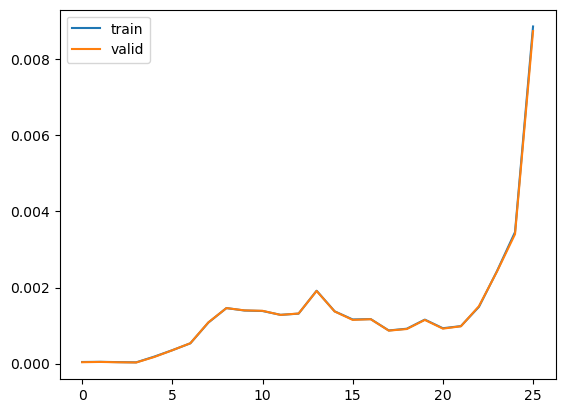

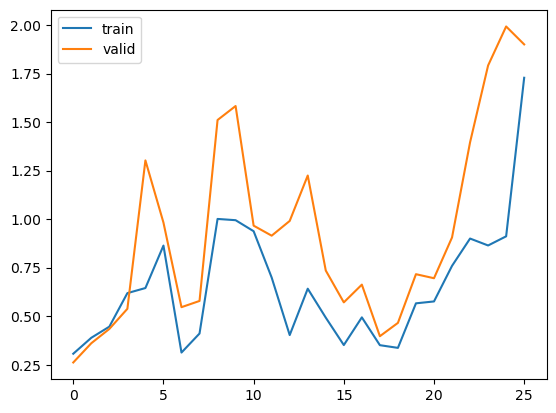

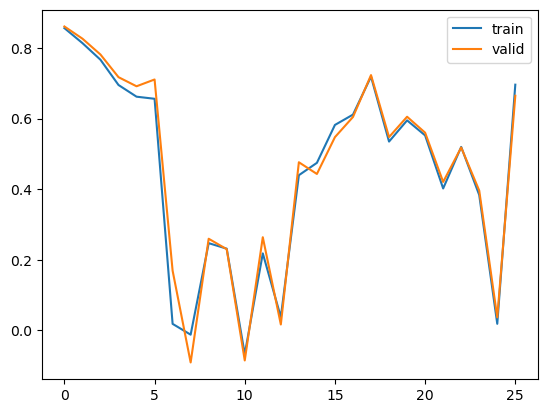

In [15]:
n = np.arange(26)
plt.plot(n, train_non_mae, label="train")
plt.plot(n, valid_non_mae, label="valid")
# plt.plot(n, test_non_mae, label="test")
plt.legend()
plt.savefig(dir+"MLP_MAE_plot.png")
plt.show()

plt.plot(n, train_nmae, label="train")
plt.plot(n, valid_nmae, label="valid")
# plt.plot(n, test_nmae, label="test")
plt.savefig(dir+"MLP_NMAE_plot.png")
plt.legend()
plt.show()

plt.plot(n, train_r, label="train")
plt.plot(n, valid_r, label="valid")
# plt.plot(n, test_r, label="test")
plt.savefig(dir+"MLP_R2_plot.png")
plt.legend()
plt.show()

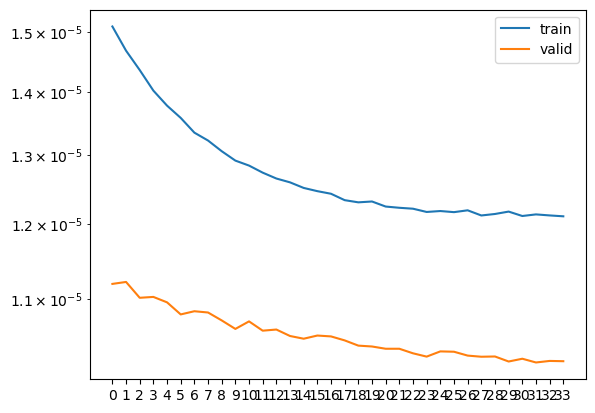

In [16]:
train_values, valid_values = evaluator.get_loss()
plt.plot(train_values, label="train")
plt.plot(valid_values, label="valid")
plt.xticks(np.arange(len(valid_values)))
plt.yscale("log")
plt.legend()
plt.show()

In [13]:
# non_mae = np.load("../../notebooks/metrics/MAE_mlp.npy")
# nmae = np.load("../../notebooks/metrics/NMAE_mlp.npy")
# r = np.load("../../notebooks/metrics/r2_mlp.npy")

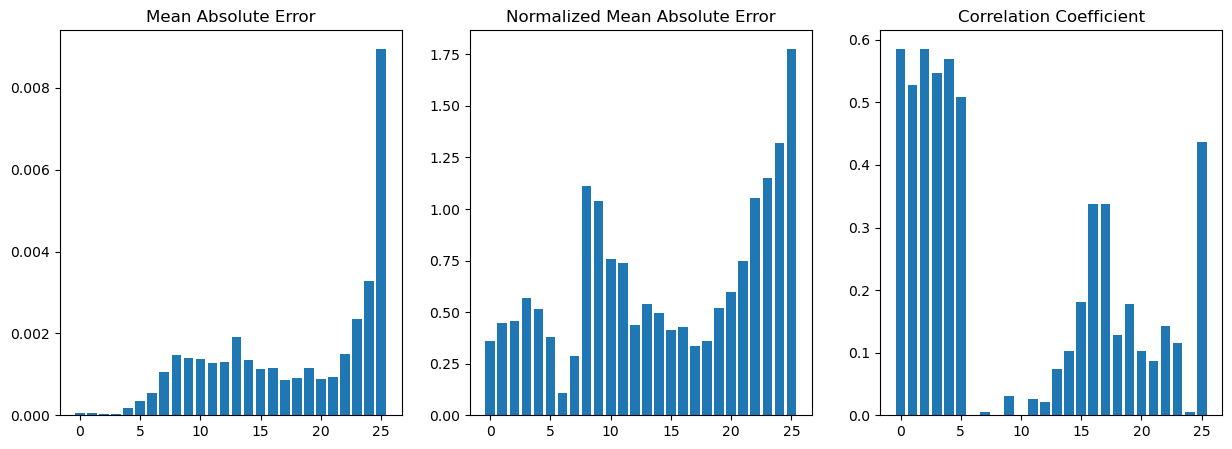

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].bar(np.arange(26), non_mae)
axs[0].set_title("Mean Absolute Error")
axs[1].bar(np.arange(26), nmae)
axs[1].set_title("Normalized Mean Absolute Error")
axs[2].bar(np.arange(26), r)
axs[2].set_title("Correlation Coefficient")
plt.show()

In [5]:
# Make prediction on every value including context
day, hour, idx = 5, 10, 2

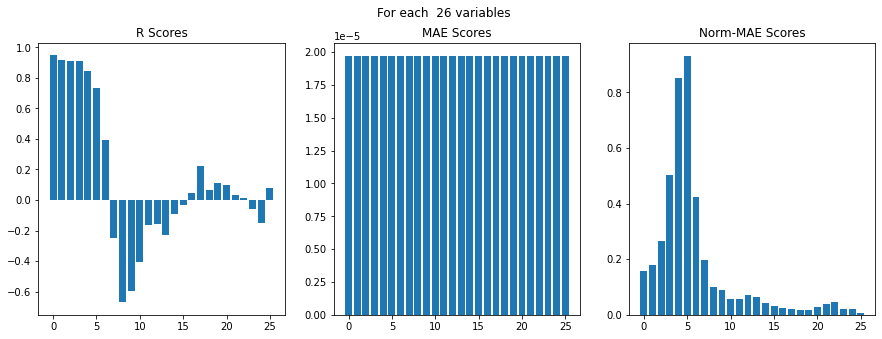

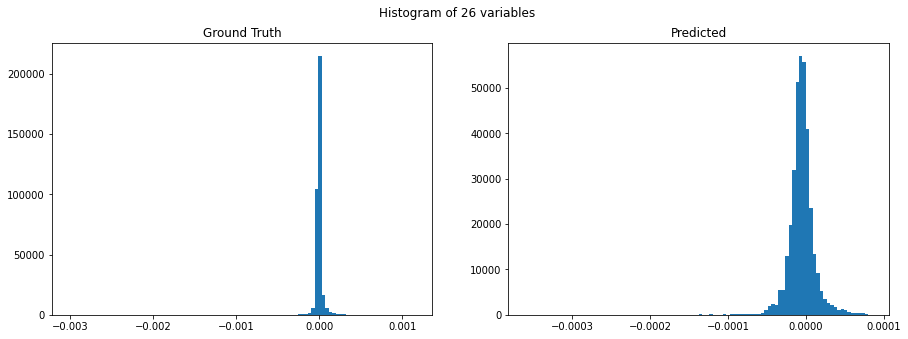

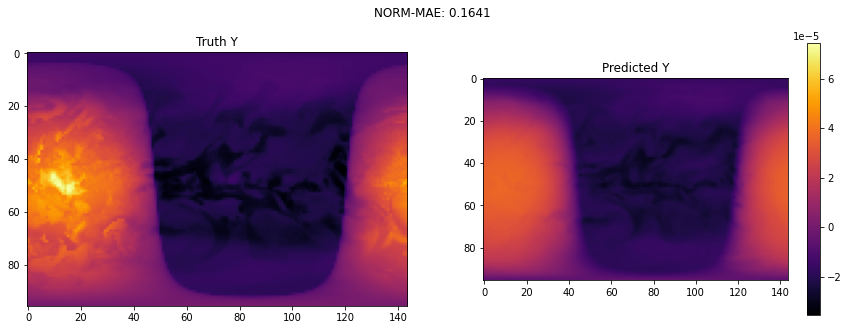

In [6]:
non_y, non_y_pred = evaluator.plot_scenario(day=day, hour=hour, split="test")


non_mae = mae_metric(non_y_pred, non_y, mean=True)
R_scores = []
vars = np.arange(26)
for i in vars:
    R_scores.append(r2_score(non_y[:, i], non_y_pred[:, i]))
norm_mae = non_mae / np.abs(non_y).max(0)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].bar(vars, R_scores)
axs[0].set_title("R Scores")
axs[1].bar(vars, non_mae)
axs[1].set_title("MAE Scores")
axs[2].bar(vars, norm_mae)
axs[2].set_title("Norm-MAE Scores")
plt.suptitle("For each  26 variables")
plt.savefig(f"../../notebooks/plots/transformer_test_metrics_{day}D_{hour}H.jpg")
plt.show()



fig, axs= plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(non_y.flatten(), bins=100)
axs[0].set_title("Ground Truth")
axs[1].hist(non_y_pred.flatten(), bins=100)
axs[1].set_title("Predicted")
plt.suptitle("Histogram of 26 variables")
plt.savefig(f"../../notebooks/plots/transformer_test_hist_{day}D_{hour}H.jpg")
plt.show()



fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.set_cmap("inferno")

non_y_img = non_y.reshape(96, 144, -1)[:, :, idx]
vmin = non_y_img.min()
vmax = non_y_img.max()

axs[0].imshow(non_y_img, vmin=vmin, vmax=vmax)
axs[0].set_title("Truth Y")
pred_img = axs[1].imshow(non_y_pred.reshape(96, 144, -1)[:, :, idx], vmin=vmin, vmax=vmax)
axs[1].set_title("Predicted Y")
fig.colorbar(pred_img, ax=axs[1])

plt.suptitle(f"NORM-MAE: {norm_mae.mean():.4f}")
plt.savefig(f"../../notebooks/plots/transformer_test_{day}D_{hour}H_{idx}V.jpg")
plt.show()

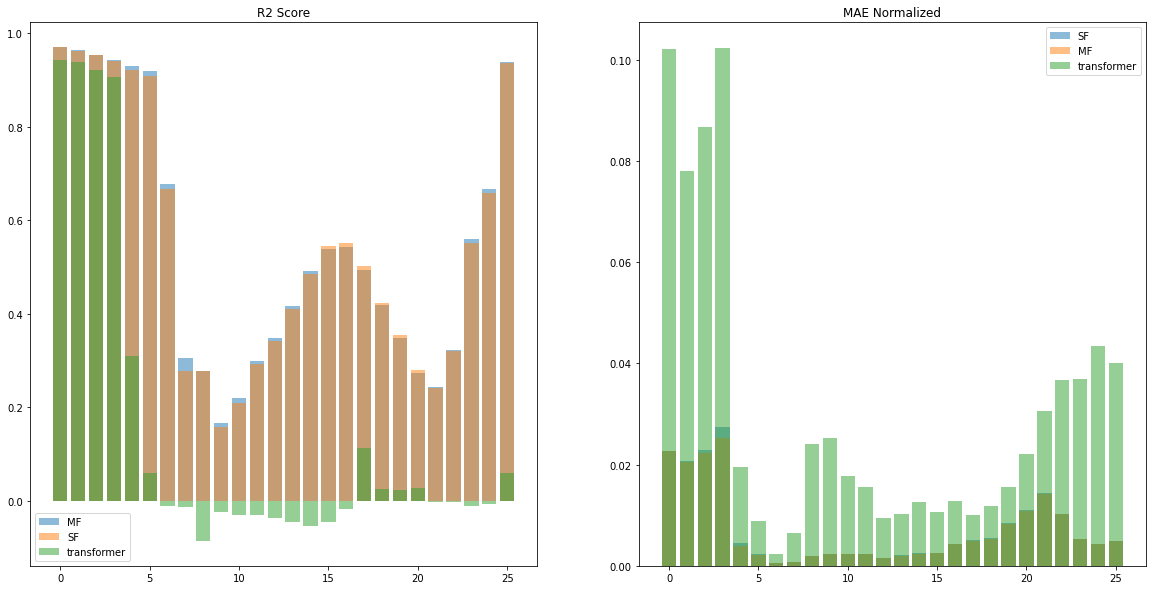

In [9]:
mf_mae = np.load("../../notebooks/aziz_metrics/MAE_MF.npy")
sf_mae = np.load("../../notebooks/aziz_metrics/MAE_SF.npy")
max_y = np.load("../../notebooks/aziz_metrics/max_abs_yH.npy")
mf_r = np.load("../../notebooks/aziz_metrics/r2_MF.npy")
sf_r = np.load("../../notebooks/aziz_metrics/r2_SF.npy")


non_mae = np.load("../../notebooks/metrics/MAE_transformer.npy")
nmae = np.load("../../notebooks/metrics/NMAE_transformer.npy")
r = np.load("../../notebooks/metrics/r2_transformer.npy")

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
n = np.arange(26)
axs[0].bar(n, mf_r, alpha=0.5, label="MF")
axs[0].bar(n, sf_r, alpha=0.5, label="SF")
axs[0].bar(n, r, alpha=0.5, label="transformer")
axs[0].legend()
axs[0].set_title("R2 Score")

axs[1].bar(n, sf_mae, alpha=0.5, label="SF")
axs[1].bar(n, mf_mae, alpha=0.5, label="MF")
axs[1].bar(n, nmae, alpha=0.5, label="transformer")
axs[1].legend(loc="upper right")
axs[1].set_title("MAE Normalized")
plt.show()

In [4]:
import vtk
import numpy as np
import os, sys, glob, dill
from tqdm import trange
import vtk.util.numpy_support as numpy_support

def array_to_vtk(array, filename):
    # Convert the NumPy array to a vtkImageData object
    image = vtk.vtkImageData()
    image.AllocateScalars(vtk.VTK_FLOAT, 1)

    vtk_data = numpy_support.numpy_to_vtk(num_array=array.flatten(), deep=True, array_type=vtk.VTK_FLOAT)
   
    image.GetPointData().SetScalars(vtk_data)
    image.SetDimensions(array.shape[::-1])

    # Write the vtkImageData object to a VTK file
    writer = vtk.vtkXMLImageDataWriter()
    writer.SetFileName(f"{filename}.vti")
    writer.SetInputData(image)
    writer.Write()

day, hour = 5, 10
non_y, non_y_pred = evaluator.plot_scenario(day=day, hour=hour, split="test")
non_y = non_y.reshape(96, 144, -1)
non_y_pred = non_y_pred.reshape(96, 144, -1)
space = np.zeros((96, 20, 26))

array_to_vtk(np.concatenate((non_y, space, non_y_pred), axis=1), f'/home/mkim/Nserver/climate_processes/paraview/data/transformer_y&pred_{day}D_{hour}H')